In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
# Load dataset (Replace with actual file path or URL if available)
dataset_path = "/content/Quote-Equity-TATAMOTORS-EQ-29-10-2024-to-29-11-2024.csv"
data = pd.read_csv(dataset_path)

In [4]:
# Parse the 'Date' column and set it as the index
data['Date '] = pd.to_datetime(data['Date '], errors='coerce')
data.set_index('Date ', inplace=True)

In [8]:
# Remove commas and convert numeric columns to float
columns_to_clean = ['OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ']
for col in columns_to_clean:
    data[col] = data[col].replace({',': ''}, regex=True).astype(float)

In [9]:
# Preview the cleaned dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
           series    OPEN    HIGH     LOW   PREV. CLOSE     ltp   close   \
Date                                                                       
2024-11-29      EQ  779.50  789.40  777.05        779.45  787.35  786.45   
2024-11-28      EQ  783.00  792.55  778.00        783.95  781.50  779.45   
2024-11-27      EQ  785.05  791.90  779.10        783.00  785.20  783.95   
2024-11-26      EQ  797.15  801.80  780.15        796.60  784.20  783.00   
2024-11-25      EQ  808.05  810.20  793.65        791.00  797.40  796.60   

             vwap   52W H   52W L      VOLUME         VALUE  No of trades   
Date                                                                        
2024-11-29  784.67  1179.0  674.25  10358590.0  8.128035e+09      2,15,035  
2024-11-28  784.58  1179.0  674.25  10939142.0  8.582655e+09      2,72,953  
2024-11-27  785.34  1179.0  674.25  10014685.0  7.864976e+09      2,00,451  
2024-11-26  789.35  1179.0  674.25  10310838.0  8.138874e+09     

In [10]:
# Choose the column for time series analysis (e.g., 'close' prices)
time_series = data['close ']

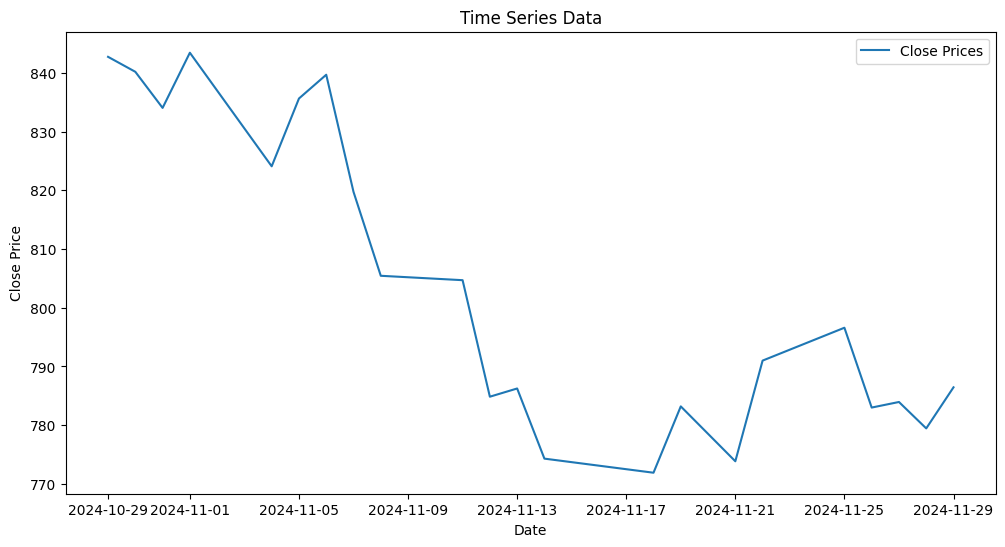

In [11]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Close Prices')
plt.title("Time Series Data")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [12]:
# Check for missing values
print("\nChecking for missing values:")
print(time_series.isnull().sum())



Checking for missing values:
0


In [13]:
# Handle missing values (forward fill)
time_series = time_series.fillna(method='ffill')

<ipython-input-13-a6949a9358ab>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series = time_series.fillna(method='ffill')


In [14]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(time_series.describe())


Descriptive Statistics:
count     22.000000
mean     803.845455
std       25.925787
min      771.900000
25%      783.387500
50%      793.800000
75%      831.562500
max      843.450000
Name: close , dtype: float64


<Figure size 1200x600 with 0 Axes>

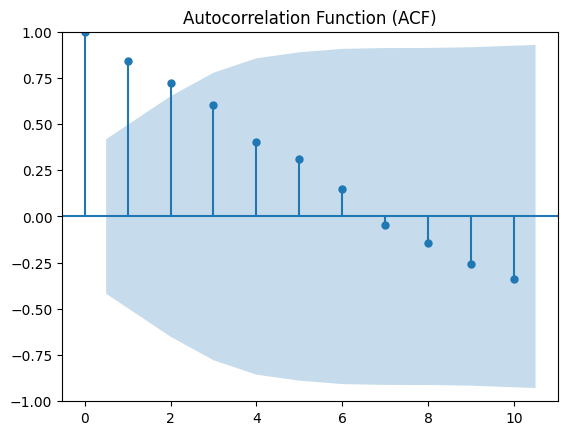

<Figure size 1200x600 with 0 Axes>

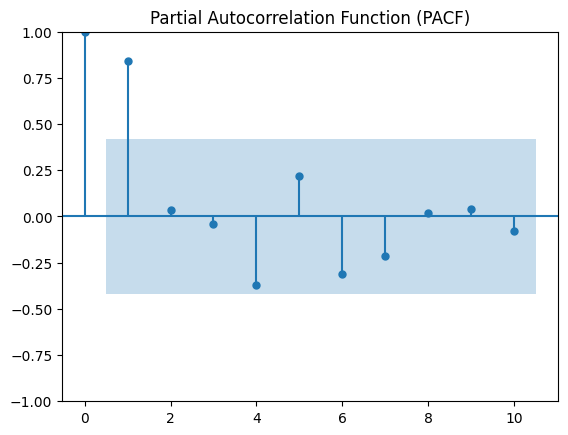

In [19]:
# ACF and PACF plots
max_lags = min(30, len(time_series) // 2 - 1)

plt.figure(figsize=(12, 6))
plot_acf(time_series.dropna(), lags=max_lags)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(time_series.dropna(), lags=max_lags)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

In [20]:
# Fit ARIMA model
order = (1, 1, 1)  # Adjust order based on ACF/PACF analysis
model = ARIMA(time_series, order=order)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [21]:
# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 close    No. Observations:                   22
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -79.989
Date:                Fri, 29 Nov 2024   AIC                            165.978
Time:                        15:03:52   BIC                            169.111
Sample:                             0   HQIC                           166.658
                                 - 22                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2481      1.094     -0.227      0.821      -2.393       1.897
ma.L1          0.0584      1.143      0.051      0.959      -2.182       2.299
sigma2       118.9146     46.896      2.536      0.0

In [22]:
# Forecast the next 10 steps
forecast = model_fit.forecast(steps=10)
print("\nForecast:")
print(forecast)


Forecast:
22    842.341291
23    842.442707
24    842.417542
25    842.423786
26    842.422237
27    842.422621
28    842.422526
29    842.422550
30    842.422544
31    842.422545
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [23]:
# Train-test split for evaluation
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]
model = ARIMA(train, order=order)
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [24]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
print(f"\nMean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 53.3171297649752
Mean Absolute Error: 6.467217650748012


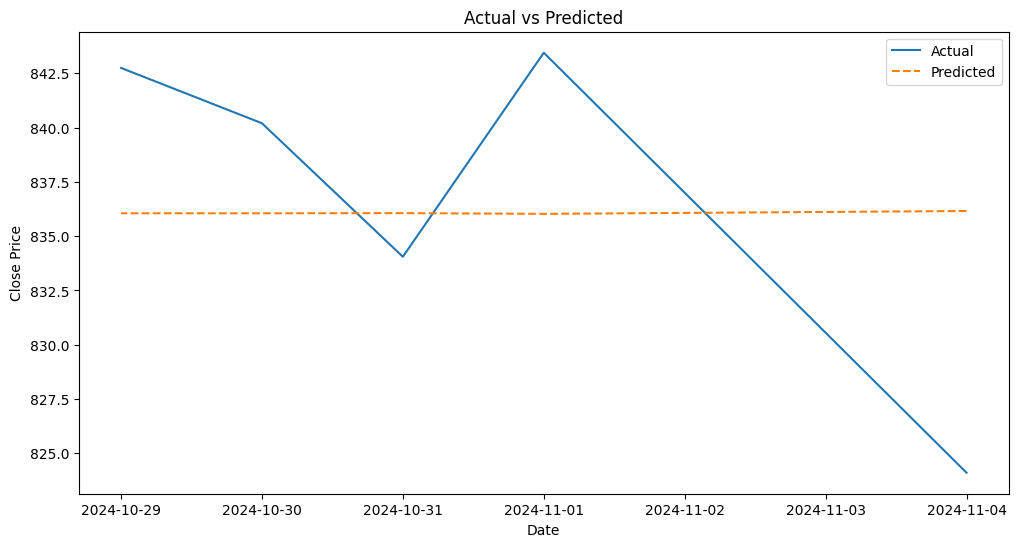

In [25]:
# Plot predictions vs actual data
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', linestyle='--')
plt.title("Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [ ]:
#By Riya Bablu Gupta